In [1]:
# Display plots in the notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [150]:
# Common imports
import numpy as np
import pylab as pl
import pandas as pd
import geopandas as gp
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA

In [3]:
# Make plots prettyful
pl.style.use('fivethirtyeight')

In [63]:
demographics = pd.read_excel('../data/DemoData.xlsx')
demographics['tract'] = demographics.ID.astype(str).str.zfill(9)

In [109]:
shp = gp.GeoDataFrame.from_file('../data/merged.json')

shp = shp.merge(demographics, on='tract')

shp.rename(columns={
    'Destination?': 'is_dest',
    'Origin?': 'is_orig',
    'Total Population': 'pop',
    '18 to 24 yrs': '_18_to_24',
    '65 and Above': 'above_65',
    'Median Age': 'age',
    'Non-white': 'nonwhite',
    'English less than "very well"': 'nonenglish',
    'Annaul Individual Income below 10000': 'income_below_10000',
    'Annaul Individual Income below 15000': 'income_below_15000',
    'Median Income': 'income',
    'Below 100 percent of the poverty level': 'below_pov',
    '100 to 149 percent of the poverty level': '_100_149_pov',
    'At or above 150 percent of the poverty level': 'above_150_pov',
    'Citizenship status': 'noncitizen',
    'Place of Birth': 'foreignborn'
}, inplace=True)

In [110]:
shp

,Both,is_dest,DollarVanLine,is_orig,average_commute_time,average_walk_distance,geometry,number_of_commuters,tract,ID,...,nonwhite,nonenglish,income_below_10000,income_below_15000,income,below_pov,_100_149_pov,above_150_pov,noncitizen,foreignborn
0,0,0,1,1,573.930196,235.091885,"POLYGON ((988504.1384277344 198118.3380126953,...",1934,061000201,61000201,...,76.5,47.4,27.6,42.3,13765,44.8,9.5,45.7,11.3,11.8
1,0,0,1,1,329.486464,94.019527,"(POLYGON ((989149.298828125 196328.6047973633,...",4839,061000202,61000202,...,55.9,26.5,29.7,38.8,16333,22.4,13.0,64.6,2.1,6.0
2,1,1,1,1,208.393849,65.878468,"POLYGON ((987978.8082275391 197698.2456054688,...",7023,061000600,61000600,...,87.5,52.2,34.6,46.0,11441,39.3,15.3,45.4,9.4,10.9
3,0,0,0,0,106.237555,39.465694,(POLYGON ((984943.4877929688 194173.7781982422...,11189,061000700,61000700,...,27.6,4.4,4.8,6.5,76202,10.3,1.2,88.5,2.6,4.8
4,1,1,1,1,209.682176,95.011414,"POLYGON ((986494.1445922852 197775.8300170898,...",6104,061000800,61000800,...,90.9,61.1,25.0,40.1,15055,32.4,18.1,49.5,16.2,16.3
5,0,0,0,0,287.232364,121.067453,(POLYGON ((984175.4826049805 192471.2318115234...,2991,061000900,61000900,...,20.1,2.7,3.1,7.4,102869,8.2,0.6,91.2,1.1,4.5
6,0,0,1,1,722.709053,293.845071,"POLYGON ((991128.2537841797 199590.250793457, ...",1447,061001001,61001001,...,23.1,5.5,12.4,18.0,50139,6.2,0.8,93.0,3.4,5.8
7,0,0,1,1,461.177405,173.921031,"POLYGON ((990784.524230957 199725.3294067383, ...",3461,061001002,61001002,...,70.7,33.3,34.1,49.6,12826,31.5,20.7,47.9,4.3,7.8
8,0,0,1,1,382.116454,148.148316,"POLYGON ((989934.2239990234 199730.8380126953,...",3057,061001200,61001200,...,46.7,26.6,21.0,31.1,26980,15.0,16.4,68.6,1.2,6.0
9,0,0,0,0,154.604708,53.877743,"POLYGON ((980015.6190185547 196065.4348144531,...",6924,061001300,61001300,...,26.4,1.7,3.9,6.9,97750,8.3,1.8,89.9,3.0,5.3


In [111]:
shp.columns

Index([                 u'Both',               u'is_dest',
               u'DollarVanLine',               u'is_orig',
        u'average_commute_time', u'average_walk_distance',
                    u'geometry',   u'number_of_commuters',
                       u'tract',                    u'ID',
                   u'Geography',                   u'pop',
                   u'_18_to_24',              u'above_65',
                         u'age',              u'nonwhite',
                  u'nonenglish',    u'income_below_10000',
          u'income_below_15000',                u'income',
                   u'below_pov',          u'_100_149_pov',
               u'above_150_pov',            u'noncitizen',
                 u'foreignborn'],
      dtype='object')

In [112]:
# Standardize Value Range
for c in [
        u'average_commute_time', u'average_walk_distance',
        u'number_of_commuters',u'pop',
                       u'_18_to_24',                    u'above_65',
                         u'age',             u'nonwhite',
                  u'nonenglish',    u'income_below_10000',
          u'income_below_15000',                u'income',
                   u'below_pov',           u'_100_149_pov',
               u'above_150_pov',            u'noncitizen',
                 u'foreignborn'
]:
    shp[c] = ((shp[c] - shp[c].mean())/shp[c].std())

In [113]:
shp.corr()

,Both,is_dest,DollarVanLine,is_orig,average_commute_time,average_walk_distance,number_of_commuters,ID,pop,_18_to_24,...,nonwhite,nonenglish,income_below_10000,income_below_15000,income,below_pov,_100_149_pov,above_150_pov,noncitizen,foreignborn
Both,1.000000,0.870089,0.534989,0.534989,-0.043610,-0.060313,0.006686,-0.017751,0.002865,0.006927,...,0.161327,0.081938,0.012977,0.019985,-0.057294,-0.007381,0.088641,-0.026614,0.042196,-0.002459
is_dest,0.870089,1.000000,0.438954,0.438954,-0.118898,-0.115471,0.068330,-0.016317,0.018927,0.009786,...,0.116835,0.042888,-0.011509,-0.012489,0.025447,-0.026638,0.045861,0.003877,0.008149,-0.007336
DollarVanLine,0.534989,0.438954,1.000000,1.000000,0.156067,0.096075,-0.082529,0.110538,-0.072669,-0.003109,...,0.355080,-0.036992,0.003948,0.004351,-0.106560,-0.067036,0.052634,0.032709,0.053647,-0.027960
is_orig,0.534989,0.438954,1.000000,1.000000,0.156067,0.096075,-0.082529,0.110538,-0.072669,-0.003109,...,0.355080,-0.036992,0.003948,0.004351,-0.106560,-0.067036,0.052634,0.032709,0.053647,-0.027960
average_commute_time,-0.043610,-0.118898,0.156067,0.156067,1.000000,0.910159,-0.628965,0.058409,-0.548126,-0.025455,...,0.241031,0.044742,0.061461,0.072504,-0.277354,-0.090818,-0.021981,0.078416,0.118386,0.020993
average_walk_distance,-0.060313,-0.115471,0.096075,0.096075,0.910159,1.000000,-0.575758,0.104497,-0.508703,-0.026185,...,0.181515,0.038080,0.058523,0.067969,-0.220821,-0.068988,-0.029865,0.064318,0.091691,-0.000654
number_of_commuters,0.006686,0.068330,-0.082529,-0.082529,-0.628965,-0.575758,1.000000,0.036592,0.621590,-0.042928,...,-0.214352,-0.158568,-0.140525,-0.171656,0.414407,-0.078141,-0.128893,0.107333,-0.133716,-0.010627
ID,-0.017751,-0.016317,0.110538,0.110538,0.058409,0.104497,0.036592,1.000000,-0.031567,-0.142689,...,-0.244108,-0.017846,-0.310716,-0.330670,0.215598,-0.402197,-0.242421,0.399944,0.183578,-0.134503
pop,0.002865,0.018927,-0.072669,-0.072669,-0.548126,-0.508703,0.621590,-0.031567,1.000000,0.007494,...,-0.005226,0.108148,0.067498,0.088548,0.010709,0.133256,0.125275,-0.148865,-0.095828,-0.073407
_18_to_24,0.006927,0.009786,-0.003109,-0.003109,-0.025455,-0.026185,-0.042928,-0.142689,0.007494,1.000000,...,0.218129,-0.010862,0.374386,0.325095,-0.297962,0.277266,0.139332,-0.265622,0.120845,0.189712


In [117]:
mod = smf.ols(formula='is_orig ~ average_commute_time + nonwhite + noncitizen + above_65 + below_pov', data = shp).fit()
print mod.summary()

                            OLS Regression Results                            
Dep. Variable:                is_orig   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     92.31
Date:                Mon, 07 Mar 2016   Prob (F-statistic):           4.54e-88
Time:                        19:55:35   Log-Likelihood:                -897.37
No. Observations:                2117   AIC:                             1807.
Df Residuals:                    2111   BIC:                             1841.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                0.2113 

In [120]:
mod = smf.ols(formula='is_dest ~ average_commute_time + nonwhite + income + pop', data = shp).fit()
print mod.summary()

                            OLS Regression Results                            
Dep. Variable:                is_dest   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     25.99
Date:                Mon, 07 Mar 2016   Prob (F-statistic):           4.61e-21
Time:                        19:58:58   Log-Likelihood:                -325.66
No. Observations:                2120   AIC:                             661.3
Df Residuals:                    2115   BIC:                             689.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                0.0920 

In [124]:
mod = smf.ols(formula='Both ~ average_commute_time + nonwhite + pop + nonenglish + foreignborn + noncitizen', data = shp).fit()
print mod.summary()

                            OLS Regression Results                            
Dep. Variable:                   Both   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     16.73
Date:                Mon, 07 Mar 2016   Prob (F-statistic):           6.04e-19
Time:                        20:01:30   Log-Likelihood:                -80.220
No. Observations:                2120   AIC:                             174.4
Df Residuals:                    2113   BIC:                             214.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                0.0712 

<matplotlib.colorbar.Colorbar instance at 0x0000000073471D88>

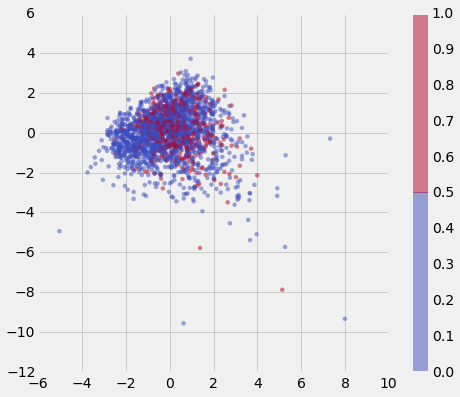

In [148]:
pca = PCA()
X = shp.dropna()[['average_commute_time', 'above_65', 'nonwhite', 'nonenglish', 'below_pov', 'noncitizen', 'foreignborn']].values
Xproj = pca.fit_transform(X)
figure, ax = plt.subplots(figsize=(7,6))
s = ax.scatter(Xproj[:, 0], Xproj[:, 1], c=shp.dropna()['is_orig'], edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('coolwarm', 2))
figure.colorbar(s, ax=ax)

In [149]:
pca.components_

array([[ 0.14144964, -0.25295468,  0.39833753,  0.36777277,  0.44940081,
         0.48258799,  0.43269397],
       [-0.11104776, -0.37032631,  0.3531932 ,  0.1363024 ,  0.43721237,
        -0.51593286, -0.49986165],
       [ 0.81783892,  0.16476315,  0.45226663, -0.19686016, -0.19615579,
        -0.08291518, -0.12386106],
       [ 0.21584483,  0.41181923, -0.26833579,  0.77079684,  0.04748247,
         0.04445866, -0.33682772],
       [-0.2142053 ,  0.76185066,  0.23808244, -0.2091787 ,  0.46682756,
        -0.16234119,  0.1702294 ],
       [-0.45401623,  0.14393185,  0.61477319,  0.20282274, -0.52618805,
         0.20482679, -0.1877282 ],
       [ 0.01400933, -0.03158433,  0.07350684,  0.35831601, -0.2671156 ,
        -0.65097   ,  0.60819393]])

[[  0.           0.           0.           0.         -26.           0.
    0.        ]
 [  0.           0.           0.           0.           0.          21.64093831
   21.56700277]]


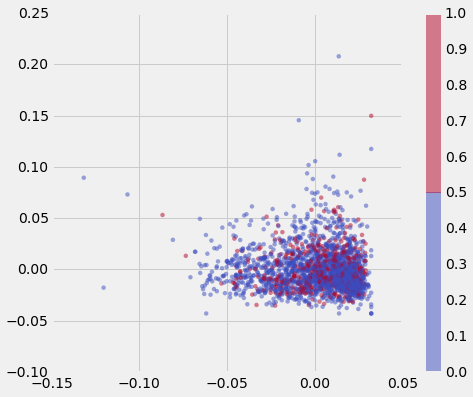

In [155]:
spca = SparsePCA(n_components=2,alpha=20,verbose=False,method='lars')
Xproj = spca.fit_transform(X)
figure, ax = plt.subplots(figsize=(7,6))
s = ax.scatter(Xproj[:, 0], Xproj[:, 1], c=shp.dropna()['is_orig'], edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('coolwarm', 2))
figure.colorbar(s, ax=ax)
print spca.components_

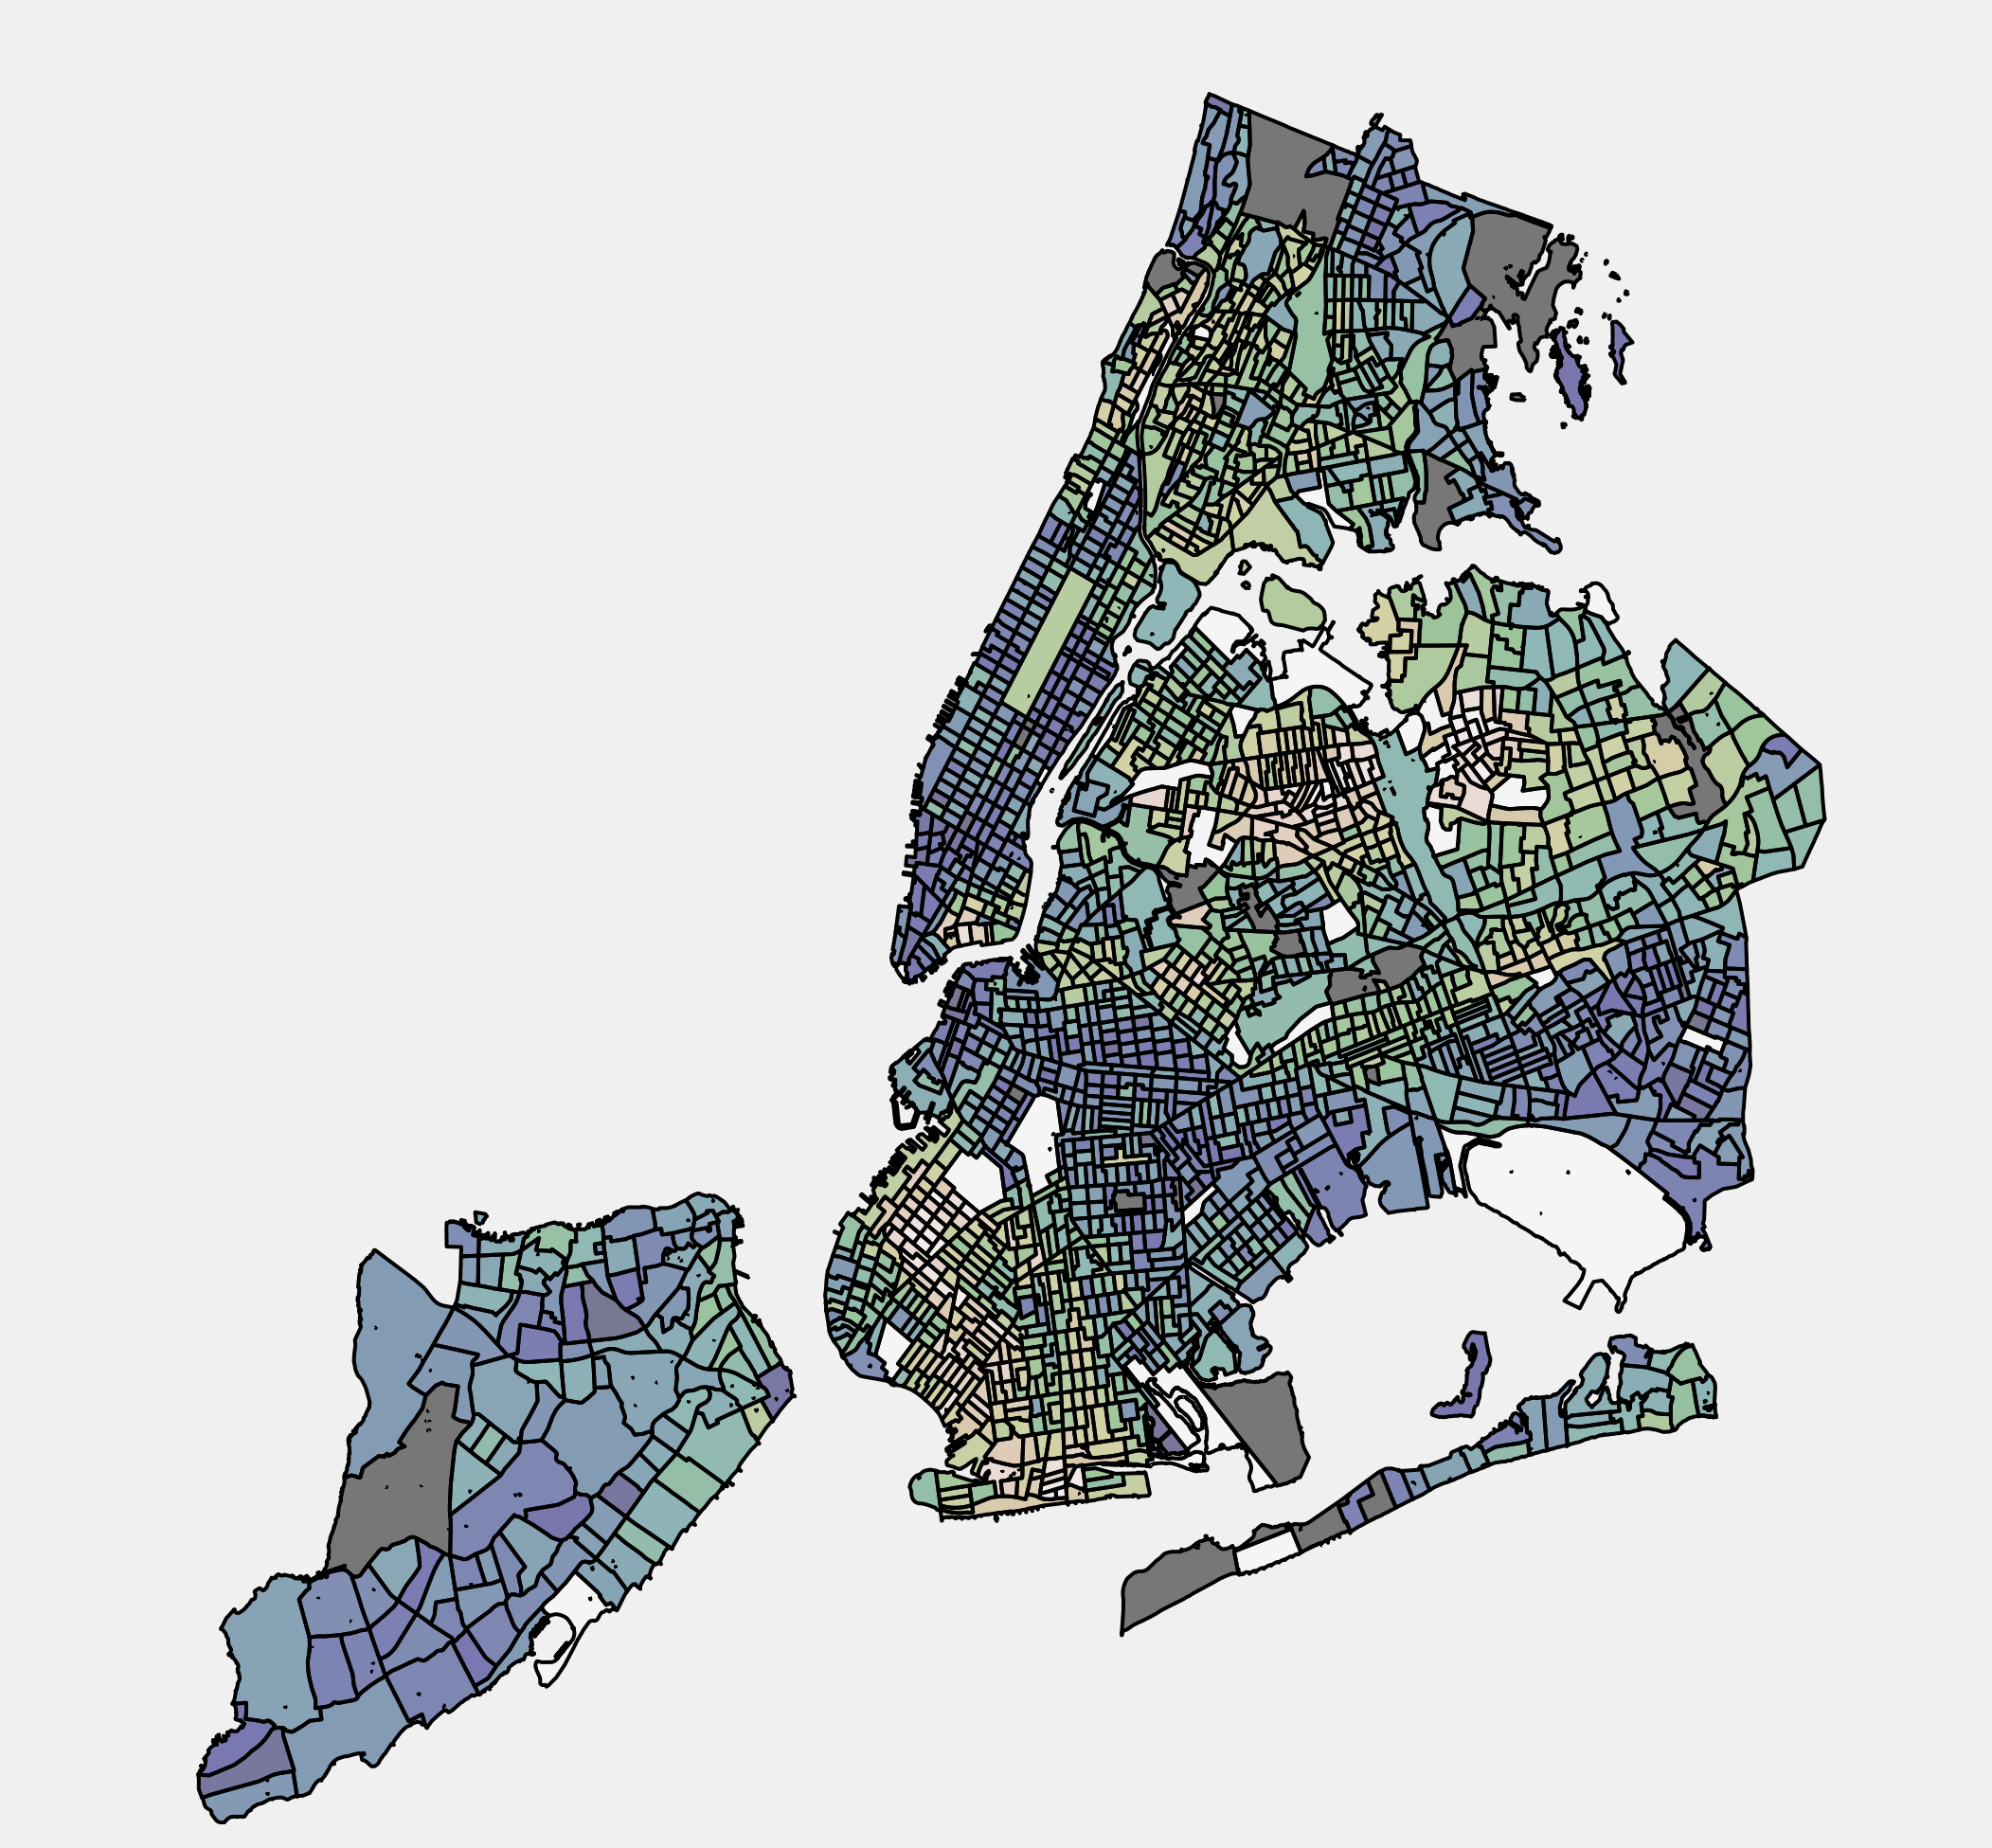

In [30]:
figure, ax = pl.subplots(figsize=(32,32))
ax.axis('off')
shp.plot(axes=ax, column='English less than "very well"', colormap='gist_earth')

In [131]:
shp.columns

Index([                 u'Both',               u'is_dest',
               u'DollarVanLine',               u'is_orig',
        u'average_commute_time', u'average_walk_distance',
                    u'geometry',   u'number_of_commuters',
                       u'tract',                    u'ID',
                   u'Geography',                   u'pop',
                   u'_18_to_24',              u'above_65',
                         u'age',              u'nonwhite',
                  u'nonenglish',    u'income_below_10000',
          u'income_below_15000',                u'income',
                   u'below_pov',          u'_100_149_pov',
               u'above_150_pov',            u'noncitizen',
                 u'foreignborn'],
      dtype='object')

In [158]:
shp.dropna()[['average_commute_time', 'above_65', 'nonwhite', 'nonenglish', 'below_pov', 'noncitizen', 'foreignborn', 'is_orig']].values

array([[-1.0567124 ,  1.12886513,  0.66172267, ...,  1.15423605,
         0.34366959,  1.        ],
       [-1.46836926,  1.056212  , -0.01781467, ..., -1.07520431,
        -0.80842323,  1.        ],
       [-1.67229597,  1.55025327,  1.02458242, ...,  0.69380815,
         0.16489656,  1.        ],
       ..., 
       [-0.8531116 , -0.62934059, -0.08049045, ..., -1.24483564,
        -1.2851513 ,  0.        ],
       [-0.56536029, -0.3532587 ,  0.64852777, ...,  0.79074034,
         0.16489656,  0.        ],
       [-0.9185287 , -0.91995311,  0.60564435, ..., -1.14790345,
        -1.18583295,  0.        ]])

In [ ]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets.classification import ClassificationDataSet
from pybrain.structure import TanhLayer
from pybrain.supervised.trainers import BackpropTrainer

net = buildNetwork(7, 10, 1, hiddenclass=TanhLayer)
ds = ClassificationDataSet(7)

data = shp.dropna()[['average_commute_time', 'above_65', 'nonwhite', 'nonenglish', 'below_pov', 'noncitizen', 'foreignborn', 'is_orig']].values
for row in data:
    ds.addSample(row[:7], row[-1])
    
trainer = BackpropTrainer(net, ds)
trainer.trainUntilConvergence()

In [166]:
print data[0]
net.activate(data[0][:7])

[-1.0567124   1.12886513  0.66172267  1.58420992  1.89450981  1.15423605
  0.34366959  1.        ]


array([ 0.74873286])

In [215]:
pred = []
for row in data:
    pred.append(1 if net.activate(row[:7]) > .25 else 0)
    
pred = np.array(pred)

print "% origin classified = ", (pred[data[:,7] == 1].sum())/(data[data[:,7] == 1][:,7].sum())
print "% !origin misclassified = ", (1.*pred[data[:,7] == 0].sum())/(data[data[:,7] == 0][:,7].shape[0])

% origin classified =  0.79418344519
% !origin misclassified =  0.204790419162


% origin classified =  0.79418344519
% !origin misclassified =  0.204790419162


In [188]:
abs(pred - data[:,7]).sum()

323.0

In [189]:
data[:,7]

array([ 1.,  1.,  1., ...,  0.,  0.,  0.])

In [191]:
pred[data[:,7] == 1].sum()

286

In [196]:
data[data[:,7] == 1][:,7].sum()

447.0

In [205]:
data[data[:,7] == 0][:,7].shape[0]

1670L

In [207]:
pred[data[:,7] == 0].sum()

270